Lasagne is a lightweight library to build and train nuural networks in Theano.

* Bookkeeping device
* Collection of helper functions

In [1]:
import numpy as np
import theano
import theano.tensor as T
import lasagne

import matplotlib.pyplot as plt
%matplotlib inline

import gzip
import pickle


In [2]:
np.random.seed(42)

In [3]:
#!wget -N http://deeplearning.net/data/mnist/mnist.pkl.gz

In [4]:
train, val, test = pickle.load(gzip.open('mnist.pkl.gz'))
X_train, y_train = train
X_val, y_val = val

In [5]:
# For training, we want to sample examples at random in small batches
def batch_gen(X, y, N):
    while True:
        idx = np.random.choice(len(y), N)
        yield X[idx].astype('float32'), y[idx].astype('int32')

In [6]:
#define the input and output
l_in = lasagne.layers.InputLayer((None, 784))
l_out = lasagne.layers.DenseLayer(
    l_in,
    num_units = 10,
    nonlinearity = lasagne.nonlinearities.softmax
)

In [7]:
#declear the input and output
X_sym = T.matrix()
y_sym = T.ivector()

In [8]:
#Theano expression
output = lasagne.layers.get_output(l_out, X_sym)
pred = output.argmax(-1)

In [9]:
#loss function
loss = T.mean(lasagne.objectives.categorical_crossentropy(output, y_sym))
acc = T.mean(T.eq(pred, y_sym))

In [10]:
#retrival all the trainable param to network
params = lasagne.layers.get_all_params(l_out)
print params

[W, b]


In [11]:
#grad 
grad = T.grad(loss, params)
updates  = lasagne.updates.sgd(grad, params, learning_rate = 0.05)
print updates

OrderedDict([(W, Elemwise{sub,no_inplace}.0), (b, Elemwise{sub,no_inplace}.0)])


In [12]:
f_train = theano.function([X_sym, y_sym], [loss, acc], updates= updates)

In [13]:
f_val = theano.function([X_sym, y_sym], [loss, acc])

In [14]:
f_predict = theano.function([X_sym], pred)

In [15]:
Batch_size = 64
N_batches = len(X_train)
N_val_batches = len(X_val)

In [16]:
train_batches = batch_gen(X_train, y_train, Batch_size)
val_batches = batch_gen(X_val, y_val, Batch_size)

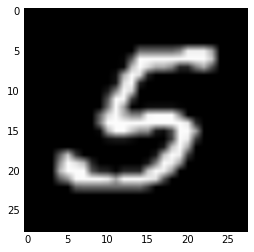

In [17]:
X, y = next(train_batches)
plt.imshow(X[0].reshape((28, 28)), cmap = 'gray')

In [18]:
# For each epoch, we call the training function N_BATCHES times,
# accumulating an estimate of the training loss and accuracy.
# Then we do the same thing for the validation set.
# Plotting the ratio of val to train loss can help recognize overfitting.
for epoch in range(10):
    train_loss = 0
    train_acc = 0
    for _ in range(N_batches):
        X, y = next(train_batches)
        loss, acc = f_train(X, y)
        train_loss += loss
        train_acc += acc
    train_loss /= N_batches
    train_acc /= N_batches

    val_loss = 0
    val_acc = 0
    for _ in range(N_val_batches):
        X, y = next(val_batches)
        loss, acc = f_val(X, y)
        val_loss += loss
        val_acc += acc
    val_loss /= N_val_batches
    val_acc /= N_val_batches
    
    print('Epoch {}, Train (val) loss {:.03f} ({:.03f}) ratio {:.03f}'.format(
            epoch, train_loss, val_loss, val_loss/train_loss))
    print('Train (val) accuracy {:.03f} ({:.03f})'.format(train_acc, val_acc))

Epoch 0, Train (val) loss 0.282 (0.260) ratio 0.922
Train (val) accuracy 0.922 (0.929)
Epoch 1, Train (val) loss 0.249 (0.256) ratio 1.030
Train (val) accuracy 0.931 (0.931)
Epoch 2, Train (val) loss 0.241 (0.259) ratio 1.076
Train (val) accuracy 0.933 (0.930)
Epoch 3, Train (val) loss 0.236 (0.262) ratio 1.112
Train (val) accuracy 0.935 (0.928)
Epoch 4, Train (val) loss 0.233 (0.265) ratio 1.138
Train (val) accuracy 0.935 (0.928)
Epoch 5, Train (val) loss 0.231 (0.266) ratio 1.152
Train (val) accuracy 0.936 (0.929)
Epoch 6, Train (val) loss 0.229 (0.266) ratio 1.163
Train (val) accuracy 0.936 (0.928)
Epoch 7, Train (val) loss 0.227 (0.264) ratio 1.160
Train (val) accuracy 0.937 (0.929)
Epoch 8, Train (val) loss 0.226 (0.267) ratio 1.181
Train (val) accuracy 0.938 (0.929)
Epoch 9, Train (val) loss 0.225 (0.268) ratio 1.189
Train (val) accuracy 0.938 (0.928)
